### description : this program uses an artificial inteligence neural network called Long Short Term Memory (lstm) 

### to predict the closing stock price of a corporation (Apple inc) using the past 60 days price




RNN -> it is a process which matches/processes the sequence like stick price. It is done by processing one element at each time while retaining the memory

RNN do not predict but instead it assit which can be sometime call as predict

e.g. = predicting the next word in google, gmail or etc.

Recurrent means oitput at current timestamp which becomes the input to the next timestamp.At every instance model just not consider the current input but rembers the previous output.

The memory in RNN alllows to remeber long term sequences.

""I was sad with the conversation but lately it make me happy""


Within RNN there is a layer i.e, memory layer  i.e, LSTM -> which  maintains the current state .. considering the previous signal is not lost .

HEre the info in Gradiant

At every instant LSTM consider the current word, the carry and the cell state

problem with RNN -----> vanishing gradiant and exploding gradiant  {gradiant - information}

cost function is
    i was sad with the concersation but lately
    
    preddict
    i am good with
    
    it will again go back and learn and again and the it will continue untill it matches with the thing we want and after that i will start predicting

vanishing -> as we move forward the weight keep on reducing but when weight be very low as compare to the present word it start to vanish or being negotiated

   'word_weight1<word_weight2<word_weight3<word_weight4<word_weight5 ... <word_weight_n   -> <word_weight1 become very less as compare to <word_weightn then it will start to vaninsh or model start to negotiate'


solution to vanishing gradiant --> exploding gradiant


**description : this program uses an artificial inteligence neural network called Long Short Term Memory (lstm)***

***to predict the closing stock price of a corporation (Apple inc) using the past 60 days price***




In [ ]:
import os

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
os.environ['KERAS_BACKEND']

In [50]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Bidirectional
#from keras.layers import Dense,Dropout, LSTM
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


**this load the data from the yahoo**

In [35]:
def stock_name():
    start = str(input('enter the starting data like yyyy-mm-dd : '))
    stock_code = str(input('stock code for whcih you want to get the visualization : '))
    df = web.DataReader(stock_code,data_source='yahoo',start='2012-01-01')
    return df

## deep learning model (lstm)

**in this so different steps involved and the out is the graph before the predition and one more graph which is after the perdition**

**LSTM is a type of Recurrent Neural Network Problem**

    in this the model learn and at the same time implement by adjusting the wait and using backward propogation which help the model to lean by itself
    
    in below it take data from 0-60 sample and predict the 61 for that it use backpropogation to adjust the output that is 61 and next time it take data from 1-61 and predict the 62 and this same process will goone untill the last value of th train dataset


In [38]:
df = stock_name()

enter the starting data like yyyy-mm-dd : 2000-01-01
stock code for whcih you want to get the visualization : BTC-USD


In [55]:
def which_stock():
    x = str(input('which one --> High,Low,Open,Close,Volume,Adj Close : '))
    print(x)
    # visualize closing price history
    plt.figure(figsize=(20,10))
    plt.title('%s price history' %x)
    plt.plot(df[x])
    plt.xlabel('date',fontsize = 10)
    plt.ylabel('%s price($)' %x)
    plt.show()
    
    df.drop_duplicates(inplace=True)
    data = df.filter([x])

    dataset  = data.values

    # getting length a training dataset with 80% of the total data 

    trainning_data_len = math.ceil(len(dataset)*0.8)
    trainning_data_len

    # scaling the data for better accuracy or for easy and better understanding

    scalar = MinMaxScaler(feature_range=(0,1))
    scaled_data = scalar.fit_transform(dataset)

    # creating traing dataset
    train_data = scaled_data[0:trainning_data_len,:]

    # spliting the data into x_train and y_train
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])

    # convert x_tain and y_train to numpy array

    x_train,y_train = np.array(x_train),np.array(y_train)
    x_train.shape,y_train.shape

    # rehsaping the data 
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


    # build the lstm model

    model = Sequential()

    # adding 1st LSTM layer with some dropout regulation
    model.add(LSTM(units=11,return_sequences=True,input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    # # adding 2nd LSTM layer with some dropout regulation
    model.add(LSTM(units=11,return_sequences=True))
    model.add(Dropout(0.2))

    # # adding 3rd LSTM layer with some dropout regulation
    model.add(LSTM(units=11,return_sequences=False))
    model.add(Dropout(0.2))

    # adding desnse hidden layer
    model.add(Dense(21))

    # adding a output layer
    model.add(Dense(1))

    # compile the model
    model.compile(optimizer='adam',loss ='mse')

    # training the model
    model.fit(x_train,y_train,epochs=11)


    # creating a test dataset 
    test_data = scaled_data[trainning_data_len-60 :]

    x_test = []
    y_test = dataset[trainning_data_len:,:]
    for i in range(60,len(test_data)):
        x_test.append(test_data[i-60:i, 0])


    # convert x_test into array 
    x_test = np.array(x_test)
    x_test.shape

    # reshape
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    x_test.shape


    # predict the values

    prediction = model.predict(x_test)
    prediction = scalar.inverse_transform(prediction)

    # get the root mean square error (rmse)

    rmse = np.sqrt(np.mean(prediction - y_test)**2 )
    rmse

    # plot the data
    train = data[:trainning_data_len]
    valid = data[trainning_data_len:]
    valid['prediction'] = prediction

    # visualize the data

    plt.figure(figsize=(20,10))
    plt.title('apple stock model')
    plt.xlabel('Data',fontsize=18)
    plt.ylabel('%s price - $'%x,fontsize=18)
    plt.plot(train[x])
    plt.plot(valid[[x,'prediction']])
    plt.legend(['train','val','prediction'],loc='lower right')
    plt.show()

In [42]:
bitcoin = stock_name()

enter the starting data like yyyy-mm-dd : 2000-01-01
stock code for whcih you want to get the visualization : BTC-USD


which one --> High,Low,Open,Close,Volume,Adj Close : Open
Open


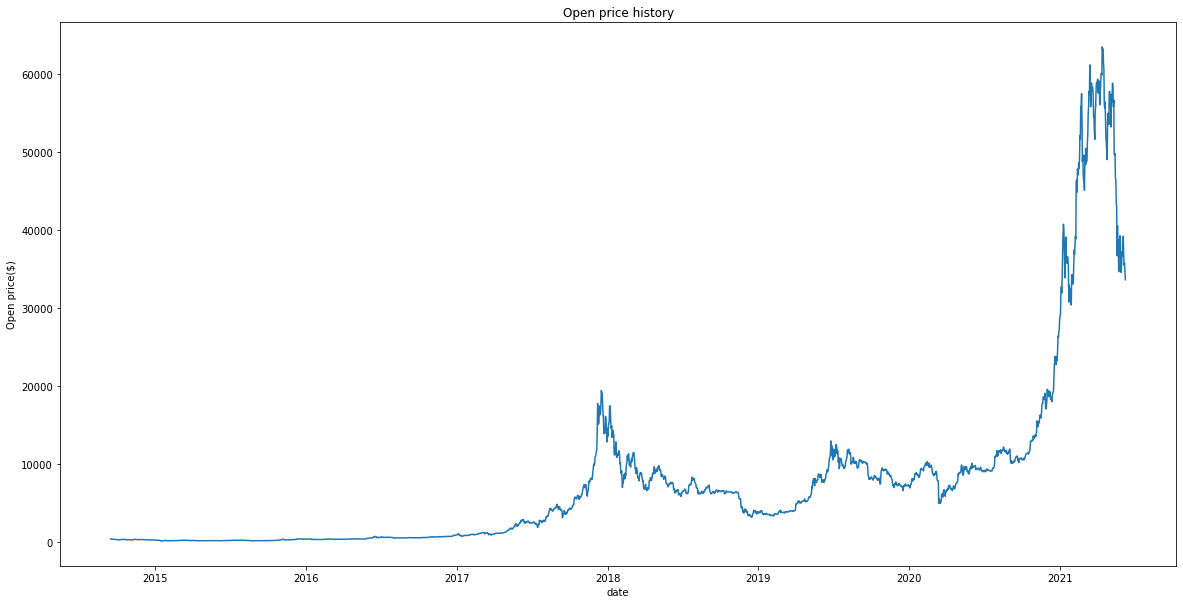

Epoch 1/11
60/60 [==============================] - 17s 83ms/step - loss: 0.0017
Epoch 2/11
60/60 [==============================] - 5s 78ms/step - loss: 4.9078e-04
Epoch 3/11
60/60 [==============================] - 5s 77ms/step - loss: 3.6517e-04
Epoch 4/11
60/60 [==============================] - 5s 77ms/step - loss: 3.1779e-04
Epoch 5/11
60/60 [==============================] - 5s 80ms/step - loss: 2.8436e-04
Epoch 6/11
60/60 [==============================] - 5s 76ms/step - loss: 2.9709e-04
Epoch 7/11
60/60 [==============================] - 5s 87ms/step - loss: 2.7995e-04
Epoch 8/11
60/60 [==============================] - 5s 87ms/step - loss: 2.9212e-04
Epoch 9/11
60/60 [==============================] - 6s 94ms/step - loss: 2.9013e-04
Epoch 10/11
60/60 [==============================] - 5s 77ms/step - loss: 2.9390e-04
Epoch 11/11
60/60 [==============================] - 5s 77ms/step - loss: 2.4380e-04


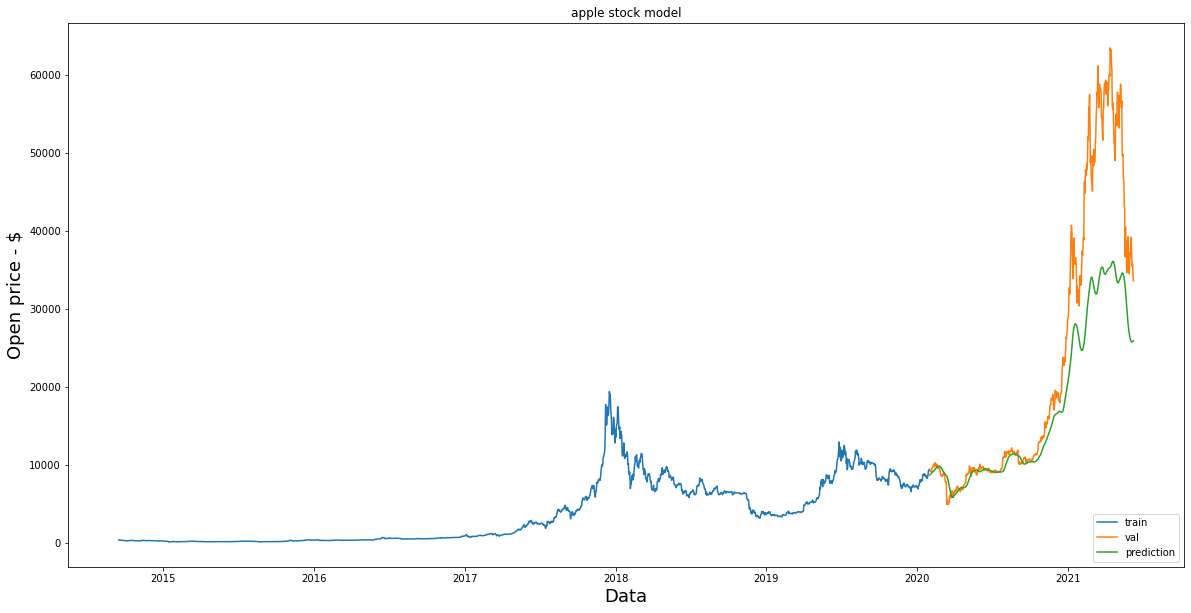

In [56]:
which_stock()